In [1]:
# Cell 1: Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Loading the dataset
df = pd.read_csv("D:/3rd_Sem_HSF/AI_ML/project_raw_risk/project_risk_raw_dataset.csv")

print("Original shape:", df.shape)

# Drop column with many missing values
if "Tech_Environment_Stability" in df.columns:
    df = df.drop(columns=["Tech_Environment_Stability"])

# Fill important missing categorical values
for col in ["Change_Control_Maturity", "Risk_Management_Maturity"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

print("After cleaning:", df.shape)

df.head()

Original shape: (4000, 51)
After cleaning: (4000, 50)


,Project_ID,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,...,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor,Risk_Level
0,PROJ_0001,Construction,32,1526276.55,32,9.70,16,Waterfall,Senior,3,...,Extreme,First-time,Basic,Basic,Fully Colocated,Good,10,5,1.0,High
1,PROJ_0002,Manufacturing,2,390790.15,9,2.72,9,Kanban,Mixed,0,...,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,9,3,1.0,Low
2,PROJ_0003,Manufacturing,2,246674.76,6,2.04,7,Agile,Mixed,1,...,Stable,Regular,Unknown,Unknown,Hybrid,Good,5,1,1.0,Medium
3,PROJ_0004,IT,12,1427830.63,17,7.54,16,Scrum,Mixed,0,...,Extreme,Strategic,Formal,Basic,Hybrid,Basic,12,6,1.1,High
4,PROJ_0005,Construction,24,1696746.64,24,6.68,17,Hybrid,Junior,0,...,Moderate,Occasional,Basic,Unknown,Partially Colocated,Basic,9,6,1.0,High


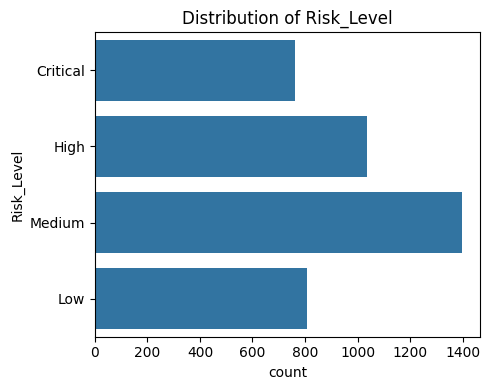

Risk_Level
Medium      1396
High        1036
Low          806
Critical     762
Name: count, dtype: int64

Numeric columns: ['Team_Size', 'Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Stakeholder_Count', 'Past_Similar_Projects', 'External_Dependencies_Count', 'Change_Request_Frequency', 'Team_Turnover_Rate', 'Vendor_Reliability_Score', 'Historical_Risk_Incidents', 'Communication_Frequency', 'Geographical_Distribution', 'Schedule_Pressure', 'Budget_Utilization_Rate', 'Market_Volatility', 'Integration_Complexity', 'Resource_Availability', 'Organizational_Change_Frequency', 'Cross_Functional_Dependencies', 'Previous_Delivery_Success_Rate', 'Technical_Debt_Level', 'Project_Start_Month', 'Current_Phase_Duration_Months', 'Seasonal_Risk_Factor']


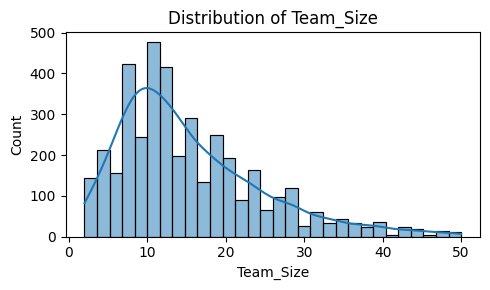

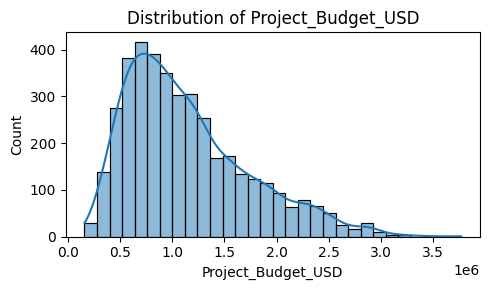

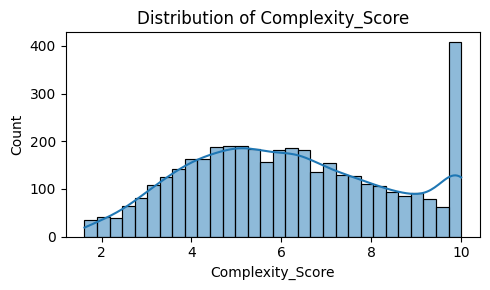

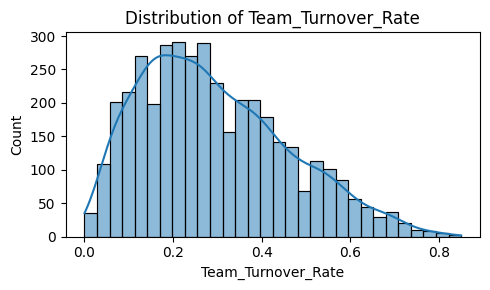

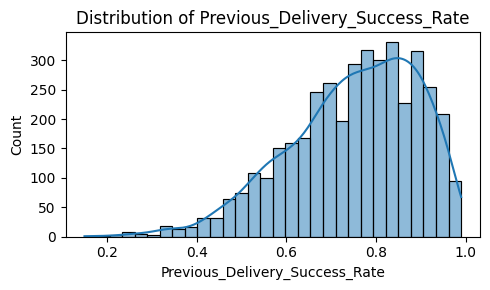

In [4]:
# Cell 3: Basic EDA – Risk level distribution and a few numeric features

# 1) Risk level distribution
plt.figure(figsize=(5, 4))
sns.countplot(y="Risk_Level", data=df, order=["Critical", "High", "Medium", "Low"])
plt.title("Distribution of Risk_Level")
plt.tight_layout()
plt.show()

print(df["Risk_Level"].value_counts())

# 2) Example numeric histograms
numeric_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumeric columns:", numeric_cols_all)

example_numeric = ["Team_Size", "Project_Budget_USD", "Complexity_Score", 
                   "Team_Turnover_Rate", "Previous_Delivery_Success_Rate"]
example_numeric = [c for c in example_numeric if c in numeric_cols_all]

for col in example_numeric:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


In [5]:
# Cell 4: Define X, y and train/test split

# Drop ID column – not useful for prediction
if "Project_ID" in df.columns:
    df_model = df.drop(columns=["Project_ID"])
else:
    df_model = df.copy()

X = df_model.drop(columns=["Risk_Level"])
y = df_model["Risk_Level"]

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in X.columns if c not in numeric_cols]

print("Number of numeric features:", len(numeric_cols))
print("Number of categorical features:", len(categorical_cols))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Number of numeric features: 25
Number of categorical features: 23
Train size: (3200, 48) Test size: (800, 48)


In [6]:
# Cell 5: Preprocessor – scale numeric, one-hot encode categorical

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)


c:\Users\manju\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression accuracy on test set: 0.72125

Classification report (Logistic Regression):
              precision    recall  f1-score   support

    Critical       0.79      0.67      0.73       153
        High       0.61      0.68      0.64       207
         Low       0.82      0.78      0.80       161
      Medium       0.72      0.75      0.73       279

    accuracy                           0.72       800
   macro avg       0.74      0.72      0.73       800
weighted avg       0.73      0.72      0.72       800



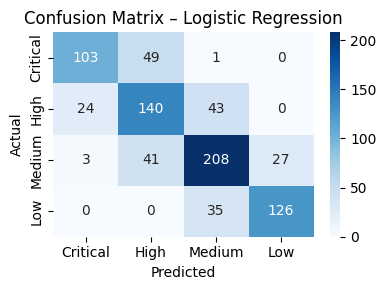

In [7]:
# Cell 6: Logistic Regression (multiclass)

log_reg_pipe = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", LogisticRegression(max_iter=1000, multi_class="multinomial")),
    ]
)

log_reg_pipe.fit(X_train, y_train)
y_pred_lr = log_reg_pipe.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression accuracy on test set:", acc_lr)

print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

labels_order = ["Critical", "High", "Medium", "Low"]
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=labels_order)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_order, yticklabels=labels_order)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Random Forest (flat) accuracy on test set: 0.55625

Classification report (Random Forest – flat):
              precision    recall  f1-score   support

    Critical       0.69      0.56      0.62       153
        High       0.46      0.29      0.36       207
         Low       0.77      0.45      0.56       161
      Medium       0.50      0.81      0.62       279

    accuracy                           0.56       800
   macro avg       0.61      0.53      0.54       800
weighted avg       0.58      0.56      0.54       800



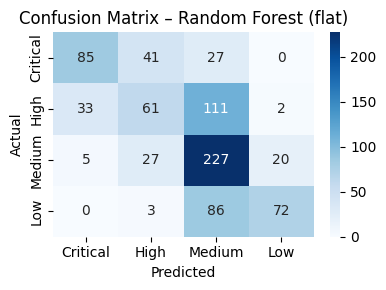

In [10]:
# Cell 7: Random Forest (flat 4-class)

rf_pipe = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=300,
            max_depth=15,
            random_state=42,
            class_weight="balanced"
        )),
    ]
)

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest (flat) accuracy on test set:", acc_rf)

print("\nClassification report (Random Forest – flat):")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels_order)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_order, yticklabels=labels_order)
plt.title("Confusion Matrix – Random Forest (flat)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Hierarchical Random Forest accuracy on test set: 0.54875

Classification report (Hierarchical RF):
              precision    recall  f1-score   support

    Critical       0.58      0.63      0.61       153
        High       0.45      0.40      0.42       207
         Low       0.81      0.38      0.52       161
      Medium       0.53      0.71      0.61       279

    accuracy                           0.55       800
   macro avg       0.59      0.53      0.54       800
weighted avg       0.58      0.55      0.54       800



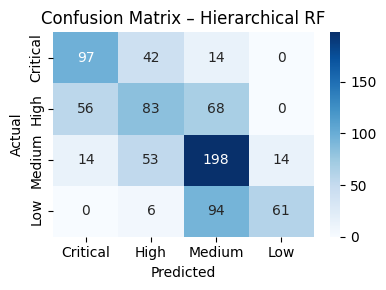

In [11]:
# Cell 8: Hierarchical Random Forest (2-stage)

# -------- Stage 1: High-risk? (High or Critical = 1, Medium/Low = 0)
y_train_highflag = y_train.isin(["High", "Critical"]).astype(int)

rf_stage1 = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            random_state=42
        )),
    ]
)
rf_stage1.fit(X_train, y_train_highflag)

# -------- Stage 2 (High branch): High vs Critical
mask_high = y_train.isin(["High", "Critical"])
X_train_high = X_train[mask_high]
y_train_high = y_train[mask_high].map({"High": 0, "Critical": 1})

rf_stage2_high = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            random_state=42
        )),
    ]
)
rf_stage2_high.fit(X_train_high, y_train_high)

# -------- Stage 2 (Low branch): Low vs Medium
mask_low = y_train.isin(["Low", "Medium"])
X_train_low = X_train[mask_low]
y_train_low = y_train[mask_low].map({"Low": 0, "Medium": 1})

rf_stage2_low = Pipeline(
    steps=[
        ("prep", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=200,
            max_depth=10,
            random_state=42
        )),
    ]
)
rf_stage2_low.fit(X_train_low, y_train_low)


# -------- Helper function to predict hierarchically on a DataFrame
def hier_predict(X_rows: pd.DataFrame) -> np.ndarray:
    preds = []
    for i in range(len(X_rows)):
        x_row = X_rows.iloc[i:i+1]

        # Stage 1: high-risk or not?
        stage1 = rf_stage1.predict(x_row)[0]

        if stage1 == 1:
            # go to High/Critical branch
            lab = rf_stage2_high.predict(x_row)[0]
            preds.append("High" if lab == 0 else "Critical")
        else:
            # go to Medium/Low branch
            lab = rf_stage2_low.predict(x_row)[0]
            preds.append("Low" if lab == 0 else "Medium")
    return np.array(preds)


# -------- Evaluate hierarchical model
y_pred_hier = hier_predict(X_test)

acc_hier = accuracy_score(y_test, y_pred_hier)
print("Hierarchical Random Forest accuracy on test set:", acc_hier)

print("\nClassification report (Hierarchical RF):")
print(classification_report(y_test, y_pred_hier))

cm_hier = confusion_matrix(y_test, y_pred_hier, labels=labels_order)

plt.figure(figsize=(4, 3))
sns.heatmap(cm_hier, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_order, yticklabels=labels_order)
plt.title("Confusion Matrix – Hierarchical RF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [12]:
# Cell 9: Quick comparison of model accuracies

print("Logistic Regression accuracy:", round(acc_lr, 3))
print("Random Forest (flat) accuracy:", round(acc_rf, 3))
print("Hierarchical RF accuracy:", round(acc_hier, 3))


Logistic Regression accuracy: 0.721
Random Forest (flat) accuracy: 0.556
Hierarchical RF accuracy: 0.549


In [13]:
# Cell 10: Feature importance from Random Forest (flat)

# 1) Access the trained RF and the preprocessor from the pipeline
rf_model = rf_pipe.named_steps["clf"]
prep = rf_pipe.named_steps["prep"]

# 2) Get the names of the one-hot encoded categorical features
ohe = prep.named_transformers_["cat"]
cat_feature_names = list(ohe.get_feature_names_out(categorical_cols))

# 3) Combine numeric + encoded categorical feature names
all_feature_names = numeric_cols + cat_feature_names

# 4) Build DataFrame of importances
importances = rf_model.feature_importances_
feat_imp = (
    pd.DataFrame({"feature": all_feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
)

feat_imp.head(15)


,feature,importance
3,Complexity_Score,0.047232
8,Team_Turnover_Rate,0.031928
20,Previous_Delivery_Success_Rate,0.027763
2,Estimated_Timeline_Months,0.027015
15,Market_Volatility,0.025850
16,Integration_Complexity,0.025443
11,Communication_Frequency,0.025299
1,Project_Budget_USD,0.024694
18,Organizational_Change_Frequency,0.023895
17,Resource_Availability,0.023871


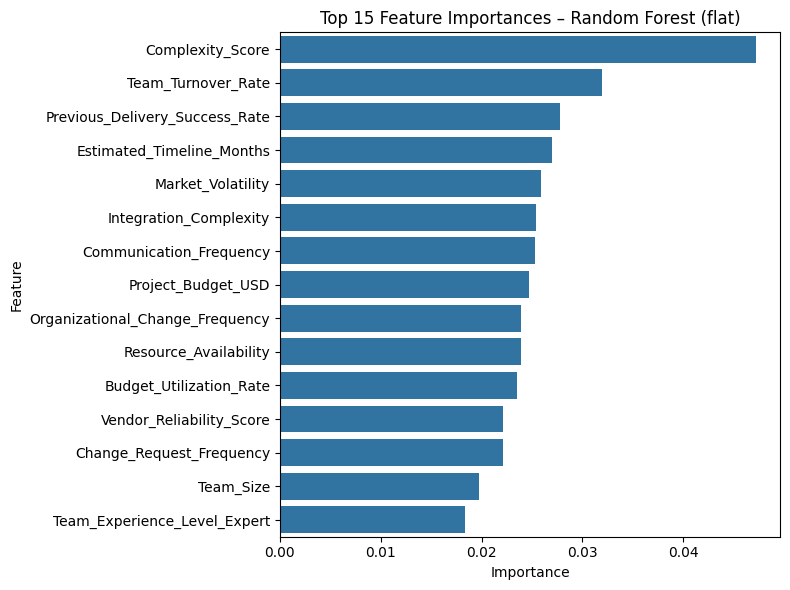

In [14]:
# Optional: bar plot of top 15 important features

top15 = feat_imp.head(15)

plt.figure(figsize=(8, 6))
sns.barplot(data=top15, x="importance", y="feature")
plt.title("Top 15 Feature Importances – Random Forest (flat)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
